https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

In [14]:
import pyforest
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## Create Dataset

In [3]:
X, y = make_classification(n_classes=2, n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X.shape, y.shape


((1000, 20), (1000,))

C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

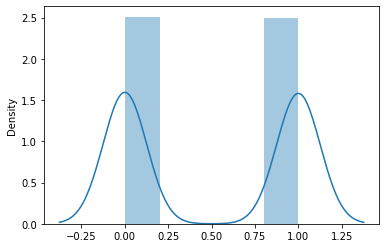

In [4]:
sns.distplot(y)

# K-fold Cross Validation

In [9]:
cv  = KFold(n_splits=10, shuffle=True, random_state=42)

## Create Model

In [10]:
model = LogisticRegression()

## Run Cross Validate data

In [11]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [13]:
print(f'Mean : {np.mean(scores):.2f}, std : {np.std(scores):.2f}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean : 0.81, std : 0.03


# Repeated K Fold

In [16]:
cv_rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [18]:
model_1 = LogisticRegression()
scores = cross_val_score(model_1, X, y, scoring='accuracy', cv=cv_rkf, n_jobs=-1)
# scores = cross_val_score(model_1, X, y, scoring='f1_macro', cv=cv_rkf, n_jobs=-1)


Mean : {np.mean(scores):.2f}, std : {np.std(scores:.2f)}


In [21]:
print(f'Mean : {np.mean(scores):.2f}, std : {np.std(scores):.2f}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean : 0.81, std : 0.03


# Repeated K fold - in for loop

In [28]:
def eval_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats)
    mdl = LogisticRegression()
    scores = cross_val_score(mdl, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [24]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, n_redundant=5) 

In [35]:
repeats = range(1,16)

In [36]:
%%time

results = []

for i in range(1, 16):
    scores = eval_model(X, y, i)
    print(f'Mean : {scores.mean():.4f}, Std : {scores.std():.4f}')
    results.append(scores)
    

Mean : 0.8390, Std : 0.0345
Mean : 0.8465, Std : 0.0257
Mean : 0.8423, Std : 0.0360
Mean : 0.8430, Std : 0.0307
Mean : 0.8434, Std : 0.0406
Mean : 0.8430, Std : 0.0368
Mean : 0.8430, Std : 0.0312
Mean : 0.8438, Std : 0.0298
Mean : 0.8434, Std : 0.0320
Mean : 0.8432, Std : 0.0361
Mean : 0.8418, Std : 0.0390
Mean : 0.8438, Std : 0.0323
Mean : 0.8438, Std : 0.0324
Mean : 0.8436, Std : 0.0356
Mean : 0.8429, Std : 0.0360
Wall time: 7.12 s


In [55]:
mean_score = [score.mean() for score in results]
mean_score

[0.8390000000000001,
 0.8465,
 0.8423333333333333,
 0.843,
 0.8434,
 0.843,
 0.8430000000000001,
 0.84375,
 0.8434444444444444,
 0.8432000000000001,
 0.8418181818181818,
 0.84375,
 0.8437692307692307,
 0.8435714285714285,
 0.8429333333333332]

In [56]:
mean_std = [score.std() for score in results]
mean_std

[0.03448187929913334,
 0.025743931323712017,
 0.036026225015797705,
 0.030675723300355926,
 0.04062560768776265,
 0.03675595189897821,
 0.031183786996267327,
 0.029806668716916354,
 0.03201253612470905,
 0.03605218439983907,
 0.03899141672871603,
 0.032328070877592846,
 0.03237438171943947,
 0.0355783125868922,
 0.036047129643781005]

In [ ]:
# line_mean = plt.plot(mean_score, label=[str(i) for i in range(1,16)])
# # line_std = plt.plot(mean_std, label=[str(i) for i in range(1,16)])
# plt.xlabel = 'repeats'
# # plt.legend(handles = [line_mean])
# plt.show()

In [37]:
len(results)

15

In [38]:
results[0]

array([0.9 , 0.84, 0.86, 0.76, 0.86, 0.85, 0.82, 0.82, 0.83, 0.85])

In [39]:
repeats

range(1, 16)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

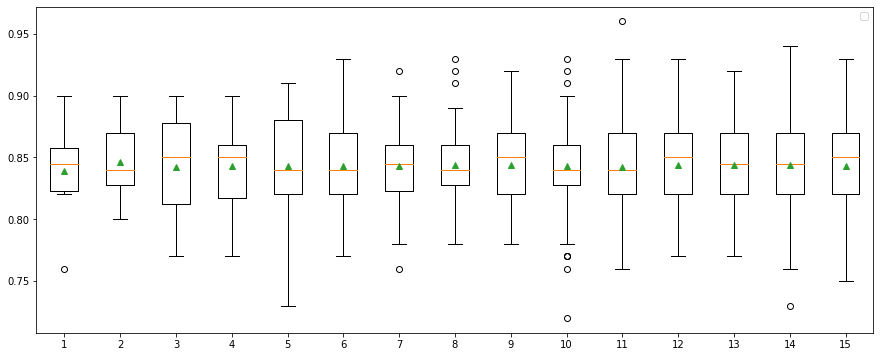

In [48]:
plt.figure(figsize=(15, 6))
plt.boxplot(results, labels=[str(i) for i in repeats], showmeans=True);
plt.legend()
plt.show()